In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrix


In [2]:
### Part 3: Statistical Modeling
#Fit a logistic regression model to see if the amount spent has a statistically significant impact 
#on the probability of winning an election.  
#Feel free to brainstorm ways to set up your model, but a suggestion to get started would be to 
#calculate, for each candidate, the percentage of the total amount spent in their race that was 
#spent by them and use this as your predictor variable of interest. Hint: you may find the `transform` 
#method (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) in combination 
#with `groupby` useful to find the total spending by race.  
#Don't forget to include the incumbent variable in your model.  
#After fitting your model, interpret the meaning of the coefficients you get. 

### MY NOTES
#Amount spent is explanatory, Winner is response
#Add column w/ groupby, sum on spent...multiply by 100 possibly...
#Be sure to fix datatypes.
#Incumbent will be important!

In [3]:
## Deliverable

#Prepare a 10-12 minute presentation of your findings. This presentation should focus on the exploratory analysis and statistical modeling portions of this project and not on the webscraping components. Thus, you should not include any code in your presenation. Your presentation should be done using PowerPoint/Google Slides or other presentation software.
#Presentations will take place on Saturday, 10/21 at noon.

In [4]:
df_glm = pd.read_csv('scraped_data_pt_3.csv')
df_glm

,Unnamed: 0.1,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,0,0,AL,1,Jerry Carl,R,0,True,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,1,1,AL,1,James Averhart,D,0,False,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,2,2,AL,2,Barry Moore,R,0,True,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,3,3,AL,2,Phyllis Harvey-Hall,D,0,False,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,4,4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,803,WI,7,Tricia Zunker,D,0,False,39.2,1261957.0,1232690.0,False,3747430.0,3899416.0,32.894277,32.362718
804,804,804,WI,8,Mike Gallagher,R,1,True,64.0,3202905.0,2841801.0,True,3241717.0,3619883.0,87.663451,88.480898
805,805,805,WI,8,Amanda Stuck,D,0,False,36.0,416978.0,399916.0,False,3241717.0,3619883.0,12.336549,11.519102
806,806,806,WY,1,Liz Cheney,R,1,True,68.6,3003883.0,3060167.0,True,3192402.0,3138480.0,95.857821,95.711395


In [5]:
#Logistic Regression model...test
glm1 = glm('Winner ~ Raised', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm1

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Winner[False]', 'Winner[True]']   No. Observations:                  808
Model:                                           GLM   Df Residuals:                      806
Model Family:                               Binomial   Df Model:                            1
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -525.38
Date:                               Sat, 21 Oct 2023   Deviance:                       1050.8
Time:                                       10:26:05   Pearson chi2:                     871.
No. Iterations:                                    5   Pseudo R-squ. (CS):            0.07902
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4102      0.101      4.068      0.000       0.213       0.608
Raised     -3.014e-07   4.48e-08     -6.727      0.000   -3.89e-07   -2.14e-07
==============================================================================
"""

In [6]:
glm2 = glm('Winner ~ Incumbent', data = df_glm, family=sm.families.Binomial()).fit().summary()
glm2

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Winner[False]', 'Winner[True]']   No. Observations:                  808
Model:                                           GLM   Df Residuals:                      806
Model Family:                               Binomial   Df Model:                            1
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -233.20
Date:                               Sat, 21 Oct 2023   Deviance:                       466.39
Time:                                       10:26:05   Pearson chi2:                     808.
No. Iterations:                                    6   Pseudo R-squ. (CS):             0.5532
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8083      0.139     12.983      0.000       1.535       2.081
Incumbent     -5.0773      0.306    -16.601      0.000      -5.677      -4.478
==============================================================================
"""

In [7]:
#df['Total_Spent_Per_District'] = df.groupby(['State', 'District'])['Spent'].transform('sum')
df_glm['Total_S_Per_District'] = df_glm.groupby(['State', 'District'])['Spent'].transform('sum')
df_glm

,Unnamed: 0.1,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,0,0,AL,1,Jerry Carl,R,0,True,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,1,1,AL,1,James Averhart,D,0,False,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,2,2,AL,2,Barry Moore,R,0,True,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,3,3,AL,2,Phyllis Harvey-Hall,D,0,False,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,4,4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,803,WI,7,Tricia Zunker,D,0,False,39.2,1261957.0,1232690.0,False,3747430.0,3899416.0,32.894277,32.362718
804,804,804,WI,8,Mike Gallagher,R,1,True,64.0,3202905.0,2841801.0,True,3241717.0,3619883.0,87.663451,88.480898
805,805,805,WI,8,Amanda Stuck,D,0,False,36.0,416978.0,399916.0,False,3241717.0,3619883.0,12.336549,11.519102
806,806,806,WY,1,Liz Cheney,R,1,True,68.6,3003883.0,3060167.0,True,3192402.0,3138480.0,95.857821,95.711395


In [8]:
df_glm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'State', 'District', 'Name', 'Party',
       'Incumbent', 'Winner', 'Vote_Percentage', 'Raised', 'Spent',
       'MaxSpentPer', 'Total_S_Per_District', 'Total_R_Per_District',
       'Per_Spent', 'Per_Raised'],
      dtype='object')

In [9]:
# drop strange columns
df_glm.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, axis=1)
df_glm

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,AL,1,Jerry Carl,R,0,True,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,AL,1,James Averhart,D,0,False,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,AL,2,Barry Moore,R,0,True,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,AL,2,Phyllis Harvey-Hall,D,0,False,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,AL,3,Mike D Rogers,R,1,True,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,WI,7,Tricia Zunker,D,0,False,39.2,1261957.0,1232690.0,False,3747430.0,3899416.0,32.894277,32.362718
804,WI,8,Mike Gallagher,R,1,True,64.0,3202905.0,2841801.0,True,3241717.0,3619883.0,87.663451,88.480898
805,WI,8,Amanda Stuck,D,0,False,36.0,416978.0,399916.0,False,3241717.0,3619883.0,12.336549,11.519102
806,WY,1,Liz Cheney,R,1,True,68.6,3003883.0,3060167.0,True,3192402.0,3138480.0,95.857821,95.711395


In [10]:
df_glm.head(1)

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,AL,1,Jerry Carl,R,0,True,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624


In [11]:
# make a column that calcs per% of spending for candidates.
#df_glm['Per_Spent'] = df_glm['Spent']/df_glm['Total_S_Per_District']*100
df_glm.head(2)

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,AL,1,Jerry Carl,R,0,True,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,AL,1,James Averhart,D,0,False,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376


In [12]:
#df_glm[]=pd.to_numeric(df["a"]) - oddly this didn't seem to work
df_glm['Winner'] = df_glm['Winner'].astype(int)
df_glm

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,AL,1,Jerry Carl,R,0,1,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,AL,1,James Averhart,D,0,0,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,AL,2,Barry Moore,R,0,1,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,AL,2,Phyllis Harvey-Hall,D,0,0,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,AL,3,Mike D Rogers,R,1,1,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,WI,7,Tricia Zunker,D,0,0,39.2,1261957.0,1232690.0,False,3747430.0,3899416.0,32.894277,32.362718
804,WI,8,Mike Gallagher,R,1,1,64.0,3202905.0,2841801.0,True,3241717.0,3619883.0,87.663451,88.480898
805,WI,8,Amanda Stuck,D,0,0,36.0,416978.0,399916.0,False,3241717.0,3619883.0,12.336549,11.519102
806,WY,1,Liz Cheney,R,1,1,68.6,3003883.0,3060167.0,True,3192402.0,3138480.0,95.857821,95.711395


In [13]:
df_glm

,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,AL,1,Jerry Carl,R,0,1,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,AL,1,James Averhart,D,0,0,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,AL,2,Barry Moore,R,0,1,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,AL,2,Phyllis Harvey-Hall,D,0,0,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,AL,3,Mike D Rogers,R,1,1,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,WI,7,Tricia Zunker,D,0,0,39.2,1261957.0,1232690.0,False,3747430.0,3899416.0,32.894277,32.362718
804,WI,8,Mike Gallagher,R,1,1,64.0,3202905.0,2841801.0,True,3241717.0,3619883.0,87.663451,88.480898
805,WI,8,Amanda Stuck,D,0,0,36.0,416978.0,399916.0,False,3241717.0,3619883.0,12.336549,11.519102
806,WY,1,Liz Cheney,R,1,1,68.6,3003883.0,3060167.0,True,3192402.0,3138480.0,95.857821,95.711395


In [14]:
#Logistic Regression model...
glm1 = glm('Winner ~ Raised', data = df_glm, family=sm.families.Binomial()).fit()
glm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -525.38
Date:                Sat, 21 Oct 2023   Deviance:                       1050.8
Time:                        10:26:05   Pearson chi2:                     871.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07902
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4102      0.101     -4.068      0.000      -0.608      -0.213
Raised      3.014e-07   4.48e-08      6.727      0.000    2.14e-07    3.89e-07
==============================================================================
"""

In [15]:
#The odds of winning multiply by exp(-3.014e^7) = 0.0 for a unit increase in 'Raised'
#The intercept coefficient of .4102 denotes the baseline log odds
#exp(-3.014e^7) = 0.0 are the odds when 'Raised' = 0.

In [16]:
#Logistic Regression model using Per_Spent
glm2 = glm('Winner ~ Per_Spent', data = df_glm, family=sm.families.Binomial()).fit()
glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -212.13
Date:                Sat, 21 Oct 2023   Deviance:                       424.25
Time:                        10:26:05   Pearson chi2:                     592.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5759
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4026      0.322    -13.679      0.000      -5.033      -3.772
Per_Spent      0.0877      0.006     15.005      0.000       0.076       0.099
==============================================================================
"""

In [17]:
#sanity checks and p values are good uses of summary.
#The odds of winning multiply by exp(.0877) = 1.9160 for a unit increase in 'Per_Spent'
#The intercept coefficient of 4.4026 denotes the baseline log odds
#exp(.0877) = 1.9160 are the odds when 'Per_Spent' = 0.

In [18]:
# Multi Logistic Reg Per_Spent + Incumbent
glm3 = glm('Winner ~ Per_Spent + Incumbent', data = df_glm, family=sm.families.Binomial()).fit()
glm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      805
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -156.76
Date:                Sat, 21 Oct 2023   Deviance:                       313.53
Time:                        10:26:05   Pearson chi2:                     636.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6302
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2956      0.348    -12.335      0.000      -4.978      -3.613
Per_Spent      0.0615      0.006     10.041      0.000       0.049       0.073
Incumbent      3.2510      0.345      9.417      0.000       2.574       3.928
==============================================================================
"""

In [19]:

# Fix this...
#The odds of winning multiply by exp(.0877) = 1.9160 for a unit increase in 'Per_Spent'
#The intercept coefficient of 4.4026 denotes the baseline log odds
#exp(.0877) = 1.9160 are the odds when 'Per_Spent' = 0.

In [20]:
# creating dummies for 'Winner ~ Per_Spent + Incumbent'
#df_glm['Winner'] = df_glm['Winner'].map({'False':0, 'True':1}) 
  
# the independent variables set 
X = df_glm[['Per_Spent', 'Incumbent',]] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)
# > 2.5 indicates high multicolinearity

     feature       VIF
0  Per_Spent  4.465027
1  Incumbent  4.465027


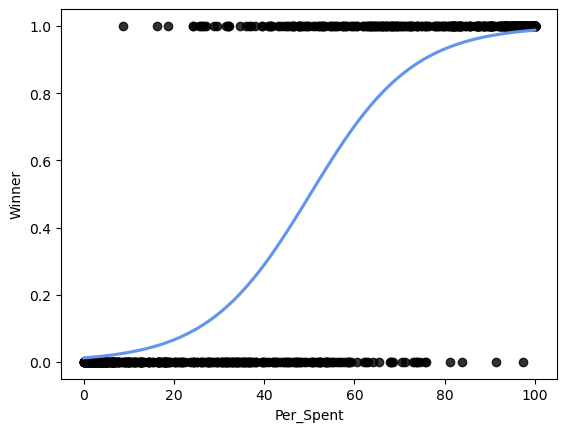

In [21]:
#Plot w/o jitter, 
#define the predictor variable and the response variable
x = df_glm['Per_Spent']
y = df_glm['Winner']

#plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=df_glm, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'cornflowerblue'});

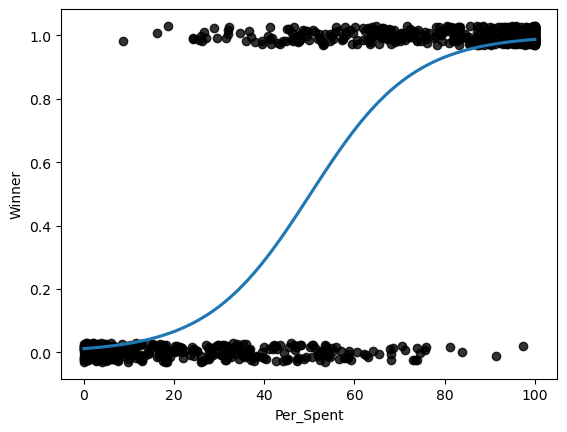

In [22]:
#Plot with jitter
sns.regplot(x = 'Per_Spent', y = 'Winner', 
            y_jitter = .03,
            data = df_glm, 
            logistic = True,
            scatter_kws={'color': 'black'},
            ci = None);

In [23]:
#Pearson correlation coefficient (PCC)[a] is a correlation coefficient that measures linear correlation 
#between two sets of data. It is the ratio between the covariance of two variables and the product  
#of their standard deviations; thus, it is essentially a normalized measurement of the covariance,
# such that the result always has a value between −1 and 1. Note that it does not assume normality. 
df_glm['Winner'].corr(df_glm['Per_Spent'])

0.8134225240093071

In [24]:
print(df_glm.columns)
cad_spent_logreg = smf.logit("Winner ~ Per_Spent",
                          data = df_glm).fit()

Index(['State', 'District', 'Name', 'Party', 'Incumbent', 'Winner',
       'Vote_Percentage', 'Raised', 'Spent', 'MaxSpentPer',
       'Total_S_Per_District', 'Total_R_Per_District', 'Per_Spent',
       'Per_Raised'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.262532
         Iterations 7


In [25]:
cad_spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.6203
Time:                        10:26:06   Log-Likelihood:                -212.13
converged:                       True   LL-Null:                       -558.64
Covariance Type:            nonrobust   LLR p-value:                9.852e-153
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4026      0.322    -13.679      0.000      -5.033      -3.772
Per_Spent      0.0877      0.006     15.005      0.000       0.076       0.099
==============================================================================
"""

In [26]:
# Could not convert because party is a categorical variable...
#df_glm['Party'] = df_glm['Party'].astype(int)

In [27]:
glm5 = glm('Winner ~ Per_Spent + Incumbent + C(Party)', data = df_glm, family=sm.families.Binomial()).fit()
glm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                            GLM   Df Residuals:                      803
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.04
Date:                Sat, 21 Oct 2023   Deviance:                       262.08
Time:                        10:26:06   Pearson chi2:                     481.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6530
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.6388      0.639    -10.385      0.000      -7.892      -5.386
C(Party)[T.I]   -19.5036   1.57e+04     -0.001      0.999   -3.08e+04    3.07e+04
C(Party)[T.R]     2.6300      0.451      5.832      0.000       1.746       3.514
Per_Spent         0.0779      0.008      9.533      0.000       0.062       0.094
Incumbent         3.8502      0.429      8.974      0.000       3.009       4.691
=================================================================================
"""

In [28]:
# These are the categorial variable matrix for column Party...
dmatrix('C(Party)', data=df_glm)

DesignMatrix with shape (808, 3)
  Intercept  C(Party)[T.I]  C(Party)[T.R]
          1              0              1
          1              0              0
          1              0              1
          1              0              0
          1              0              1
          1              0              0
          1              0              1
          1              0              1
          1              0              1
          1              0              0
          1              0              1
          1              1              0
          1              0              0
          1              0              1
          1              0              0
          1              0              1
          1              0              0
          1              0              1
          1              0              1
          1              0              0
          1              0              1
          1              0              0
 

In [29]:
# Explain this...
print(glm5.conf_int())

                          0             1
Intercept         -7.891708     -5.385794
C(Party)[T.I] -30783.099913  30744.092641
C(Party)[T.R]      1.746106      3.513886
Per_Spent          0.061891      0.093928
Incumbent          3.009299      4.691079


In [30]:
# What does the intercept here mean???
# These are the odds confidence intervals. For instance:
# Per_Spent is 1.063846, 1.098480. For a unit increase in 
# Per_Spent multiples the odds of winning by at least 1.063845  
# and as much as 1.098480
print(np.exp(glm5.conf_int()))

                       0           1
Intercept       0.000374    0.004581
C(Party)[T.I]   0.000000         inf
C(Party)[T.R]   5.732240   33.578495
Per_Spent       1.063846    1.098480
Incumbent      20.273180  108.970659


C:\Users\micha\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


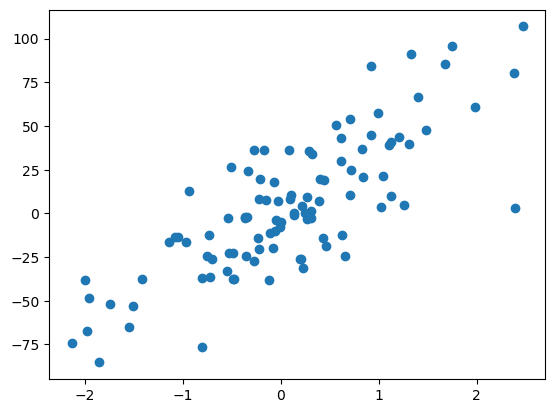

In [31]:
#Generate some test data for predictions...
# Import necessary libraries
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
# Generate 1d Regression dataset 
X,y = make_regression(n_samples = 100, n_features=1, noise=25, random_state=10)
# Plot the generated datasets
plt.scatter(X,y)
test_d = X,y
plt.show()


#Tried run training data through the model.  Couldn't get this to work...
#Compute predictions for the test sample wells_test and save as prediction
prediction = glm2.predict(exog = test_d)

#Add prediction to the existing data frame wells_test and assign column name prediction
test_d['prediction'] = prediction

#Examine the first 5 computed predictions
print(test_d[['Winner', 'Per_Spent', 'Incumbent']].head())

In [32]:
#so one way to do things is to kind of chop the field goals into a number of bins.
#pandas has a function called q cut. It helps us divide things into equal pieces (q=10 means divide into 10 equal pieces)

In [33]:
def summary_by_var(var, q = 5):
    return (
        df_glm
        .assign(group = pd.qcut(df_glm[var], 
                                q = q, 
                                duplicates = 'drop'))
        .groupby('group')
        ['Winner', 'Incumbent']
        .mean()
        .reset_index()
        .rename(columns = {'Win': 'eprob'})
    )

In [34]:
summary_by_var('Per_Spent')

C:\Users\micha\AppData\Local\Temp\ipykernel_29396\2732136289.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_glm


,group,Winner,Incumbent
0,"(-0.001, 9.628]",0.006173,0.006173
1,"(9.628, 39.909]",0.136646,0.055901
2,"(39.909, 69.371]",0.586420,0.530864
3,"(69.371, 95.237]",0.925466,0.850932
4,"(95.237, 100.0]",0.993827,0.919753


In [35]:
var = 'Incumbent'

pd.crosstab(df_glm[var],
            df_glm['Winner'],
            normalize = 'index')

Winner,0,1
Incumbent,,
0,0.859155,0.140845
1,0.036649,0.963351


In [36]:
#Note this is not very useful because Per_Spent has lots of categories...
var = 'Per_Spent'

pd.crosstab(df_glm[var],
            df_glm['Winner'],
            normalize = 'index')

Winner,0,1
Per_Spent,,
0.000000,1.0,0.0
0.030961,1.0,0.0
0.049096,1.0,0.0
0.077661,1.0,0.0
0.091096,1.0,0.0
...,...,...
99.908904,0.0,1.0
99.922339,0.0,1.0
99.950904,0.0,1.0


In [37]:
reduced_model = smf.logit('Winner ~ Per_Spent',
                        data = df_glm).fit()
full_model = smf.logit('Winner ~ Per_Spent + Incumbent + C(Party)',
                    data = df_glm).fit()

Optimization terminated successfully.
         Current function value: 0.262532
         Iterations 7
         Current function value: 0.162179
         Iterations: 35


C:\Users\micha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
# Deviance score 2llc
#so how well to the new model fit the data and are the new variables worth it. Based on the p value.
#To test this, we use the 𝐺2 statistic which compares the log-likelihood of the two models. 
#You can read more about this test at this link: https://online.stat.psu.edu/stat501/lesson/15/15.1
G2 = -2 * (reduced_model.llf - full_model.llf)
G2

162.17154495242215

In [39]:
from scipy.stats import chi2
df2 = full_model.df_model - reduced_model.df_model
df2

3.0

In [40]:
#Since p value is very small we reject the H0, namely that the reduced model is better.
p = chi2.sf(G2, df = df2)
p

6.229848635948064e-35

In [41]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                          Logit   Df Residuals:                      803
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.7654
Time:                        10:26:06   Log-Likelihood:                -131.04
converged:                      False   LL-Null:                       -558.64
Covariance Type:            nonrobust   LLR p-value:                8.502e-184
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.6388      0.639    -10.385      0.000      -7.892      -5.386
C(Party)[T.I]   -12.3998    741.938     -0.017      0.987   -1466.571    1441.771
C(Party)[T.R]     2.6300      0.451      5.832      0.000       1.746       3.514
Per_Spent         0.0779      0.008      9.533      0.000       0.062       0.094
Incumbent         3.8502      0.429      8.974      0.000       3.009       4.691
=================================================================================
"""

In [42]:
np.exp(full_model.params['Per_Spent'])

1.0810247664989856

In [43]:
np.exp(reduced_model.params['Per_Spent'])

1.0916090460429824